In [115]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
df=pd.read_csv(r'C:\\Users\\HP\\Downloads\\Titanic-Project-main\\Titanic-Project-main\\titanic_train.csv')

In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# Last 5 records
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [120]:
df.shape

(891, 12)

In [121]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [123]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [124]:
#  891 Rows and 12 Columns
# Age,cabin column have missing values
## out of 12, 7 are having integer values while 5 have categorical columns

In [125]:
# Lets analyse the data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [126]:
df['PassengerId'].nunique()

891

In [127]:
# This column has nothing to provide any input to my model. We can choose to drop this

In [128]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [129]:
# This is out Target column

In [130]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [131]:
# This seems to be class, like 1st class, 2nd class, 3rd class.  This is categorical/ ordinal column

In [132]:
df['Name'].nunique()

891

In [133]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [134]:
df['Age'].nunique()

88

In [135]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [136]:
df['Parch'].unique()  #  parent or children

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [137]:
df['Embarked'].unique()  #Embarked is alphabet for station where traveler boarded , It also have NaN values

array(['S', 'C', 'Q', nan], dtype=object)

In [138]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [139]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

# Null values

In [140]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

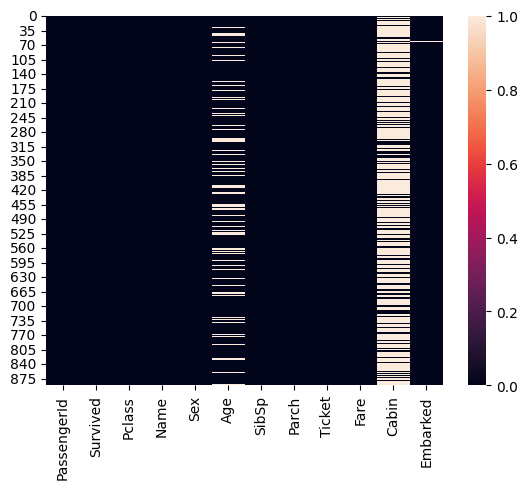

In [141]:
sns.heatmap(df.isnull())

In [142]:
#conclusion:  Age, Cabin,Embarked have null values

In [143]:
df.shape# Rows 891 and column 12

(891, 12)

In [144]:
df['Cabin'].isnull().sum()

687

In [145]:
891-687

204

In [146]:
687/891

0.7710437710437711

In [147]:
# Cabin column  77% data is missing, so filling Null vales will be impractical and it will create bias(apposite)
# We will delete this

In [148]:
177/891

0.19865319865319866

In [149]:
# Age column have 19% missing values, We will handle it

<AxesSubplot: xlabel='Sex', ylabel='count'>

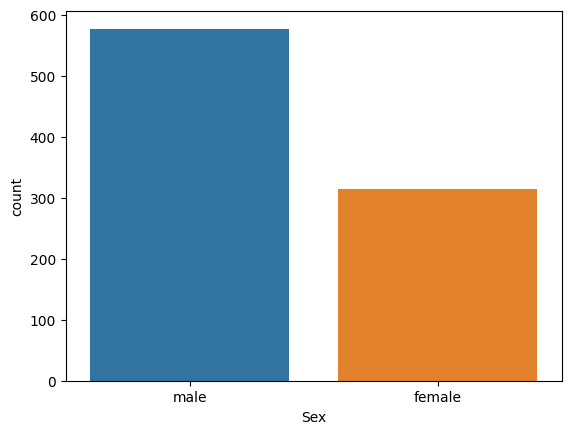

In [150]:
sns.countplot(x='Sex',data=df)

In [151]:
# COnclusion: Male are much higher in count

In [152]:
df['Sex'].value_counts().index

Index(['male', 'female'], dtype='object')

In [153]:
df['Sex'].value_counts().values

array([577, 314], dtype=int64)

In [154]:
# syntax for .. plt. pie(sizes, explode=explode, labels=labels, colors=colors, ...)

([<matplotlib.patches.Wedge at 0x1d36649c250>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.76%'),
  Text(0.26833391225261044, -0.53665343708506, '35.24%')])

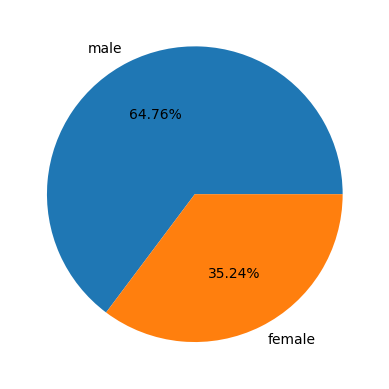

In [155]:
plt.pie(df['Sex'].value_counts().values,labels=df['Sex'].value_counts().index,autopct='%1.2f%%'  )

In [156]:
# 64.76%  are Male on Titanic  while 35.24% were Females


In [157]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot: xlabel='Sex', ylabel='count'>

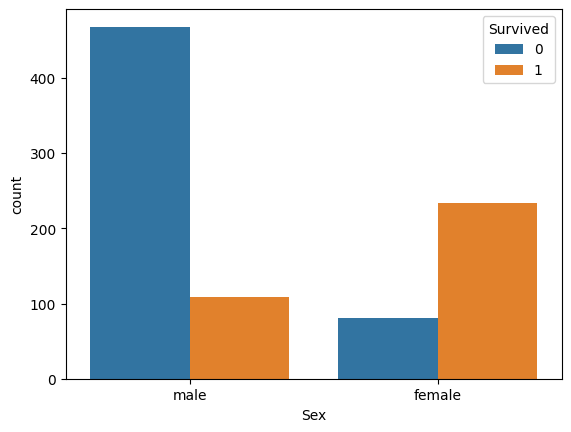

In [158]:
sns.countplot(data=df, x="Sex", hue="Survived")

In [159]:
# More Female survived than Male. Logically first Older,Female,Childs have been asked to evacuate

<AxesSubplot: xlabel='Age', ylabel='Density'>

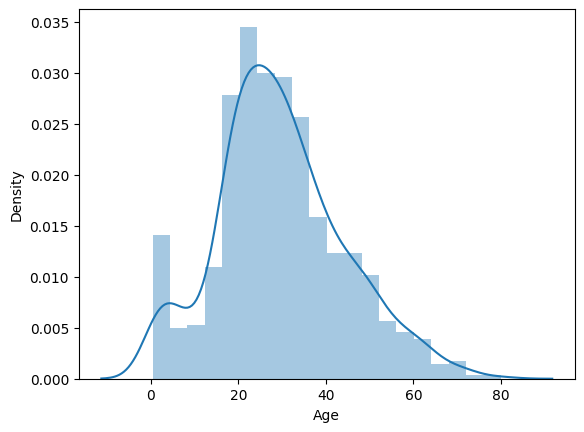

In [160]:
#Lets cheak Age distribution
sns.distplot(df['Age'])

In [161]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [162]:
df['Age'].value_counts().sort_values(ascending=False)

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
66.00     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='count'>

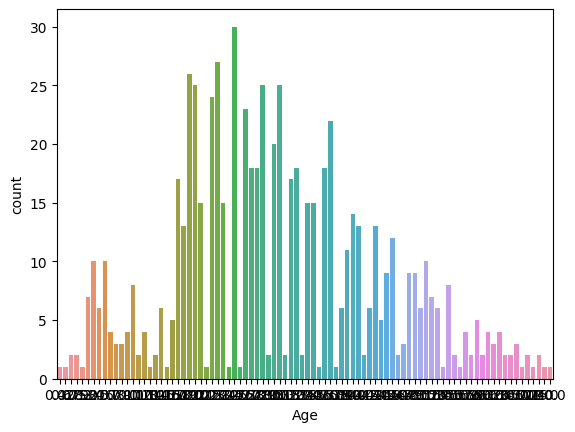

In [163]:
sns.countplot(x='Age',data=df)

In [164]:
# More were young on that ship.

In [165]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot: xlabel='Pclass', ylabel='count'>

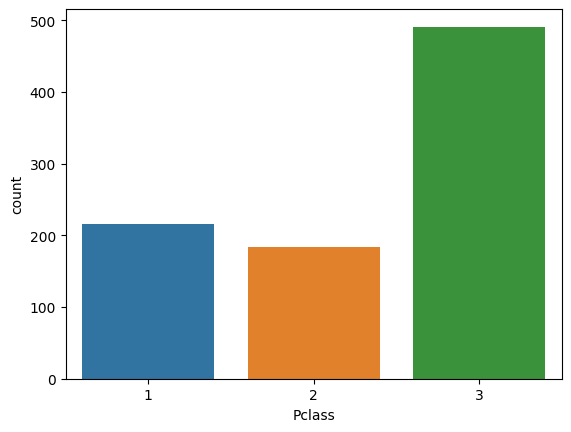

In [166]:
# any relation between Pclass and survived

sns.countplot(x='Pclass',data=df)

([<matplotlib.patches.Wedge at 0x1d369ea5450>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.11%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.24%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.65%')])

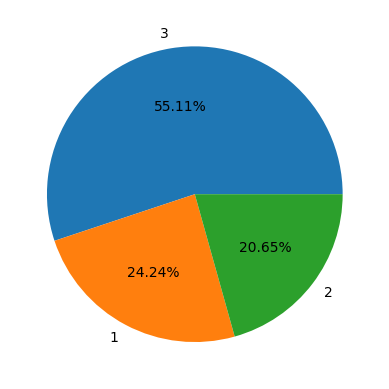

In [167]:
plt.pie(df['Pclass'].value_counts().values, labels=df['Pclass'].value_counts().index, autopct='%1.2f%%')

In [168]:
# conclusion:  55.11% travelers are in Pclass 3, 20.65% were in Pclass 2, while 24.24% were in Pclass 1

<AxesSubplot: xlabel='Pclass', ylabel='count'>

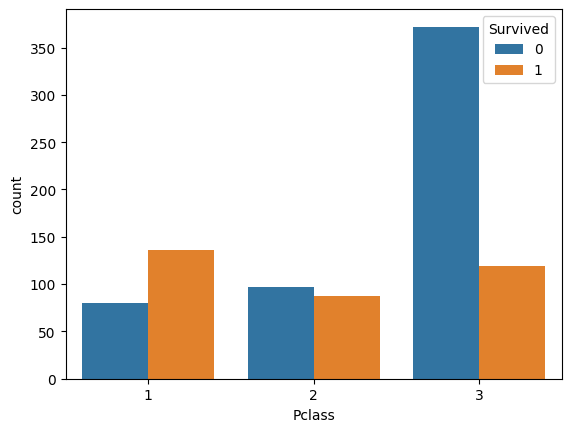

In [169]:
sns.countplot(data=df, x="Pclass", hue="Survived")

In [170]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [171]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

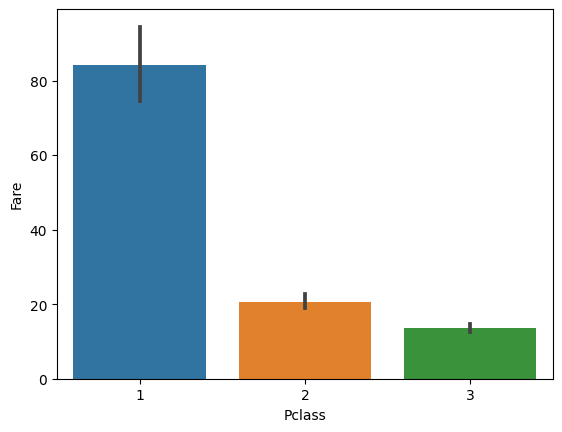

In [173]:
sns.barplot(x = "Pclass", y = "Fare", data =df)

In [174]:
# Plass have high fare,thanPclass 2, and Pclass 3 is cheapest

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

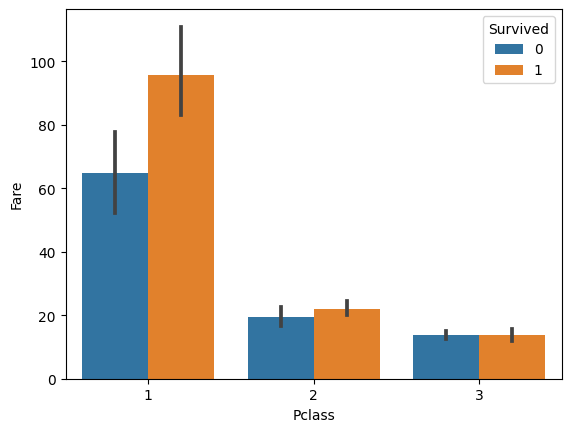

In [175]:
sns.barplot(x='Pclass',y='Fare', hue='Survived',data=df)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

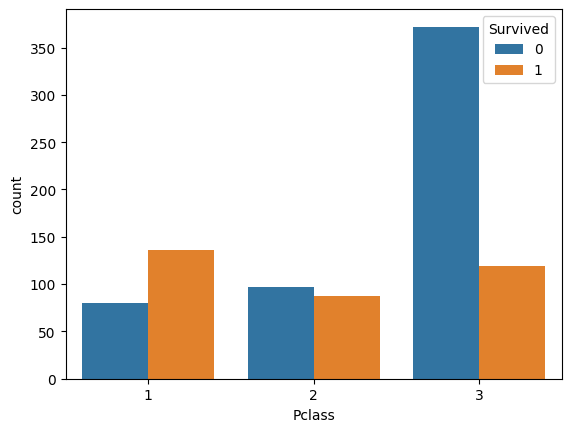

In [176]:
# Most of the survivals are from Pclass 1,
sns.countplot(x='Pclass',hue='Survived',data=df)

In [177]:
# In counts, most peoples are in Pclass 3 with low fares and died more

<AxesSubplot: xlabel='Sex', ylabel='Age'>

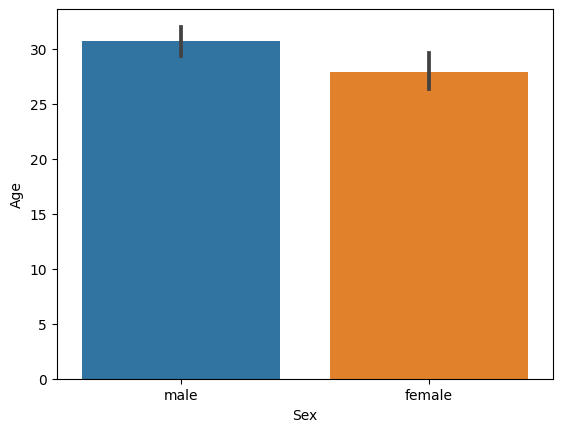

In [178]:
sns.barplot(x='Sex',y='Age',data=df)

In [179]:
# Male and Females ages are not so much different

<AxesSubplot: xlabel='Sex', ylabel='SibSp'>

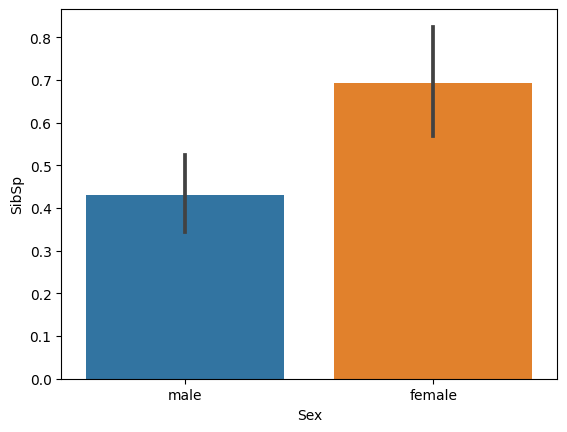

In [180]:
sns.barplot(x='Sex',y='SibSp',data=df)

In [181]:
# FEmales have more siblings

In [182]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<AxesSubplot: xlabel='Age', ylabel='Count'>

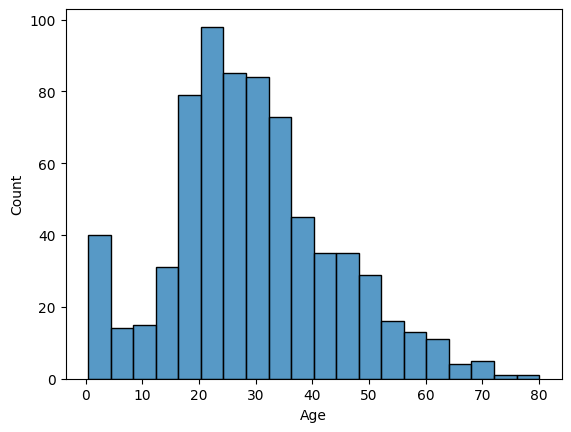

In [183]:
sns.histplot(df['Age'])

In [184]:
# Age looks have normal distribution except have infants baby less than 5 yr olds

<AxesSubplot: xlabel='Fare', ylabel='Count'>

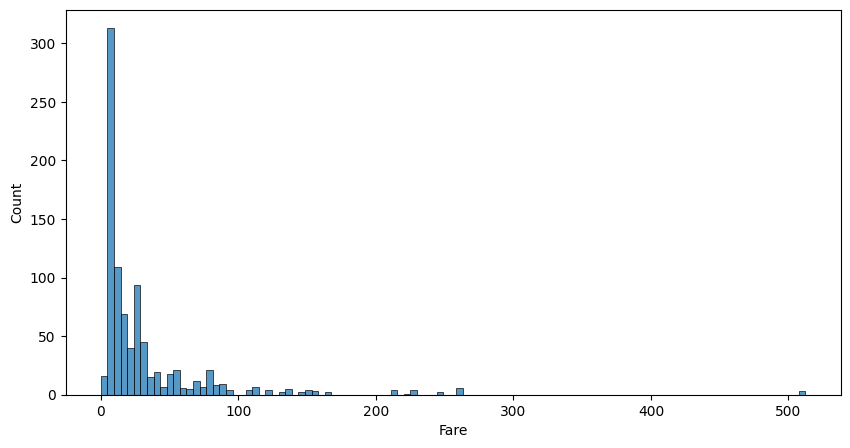

In [185]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'])

In [186]:
# Data is right skewed, however Pclass 3 have less fare with more travelers.

In [187]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [188]:
df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survival Rate')

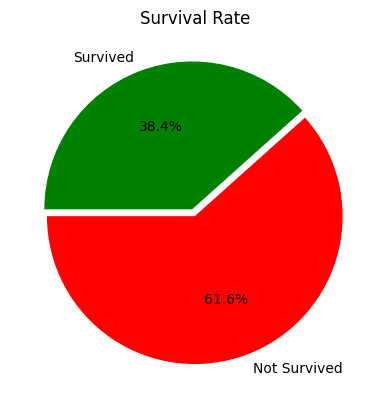

In [189]:
plt.pie(df.groupby('Survived')['Survived'].count().values,labels=['Not Survived','Survived'],autopct='%1.1f%%', startangle=180,colors=['Red','Green'],explode=[0,.05] )
plt.title('Survival Rate')

In [190]:
# 61.6% peoples are not survived, 38.4% survived only

In [191]:
df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

([<matplotlib.patches.Wedge at 0x1d36b3c4610>,
 [Text(0.8105821051351225, 0.7728885112580683, 'Pclass 1'),
  Text(-0.6334797587300933, 0.9236359646956495, 'Pclass 2'),
  Text(-0.1789109029798832, -1.1056178764812565, 'Pclass 3')],
 [Text(0.44871509391408565, 0.42784899730357356, '24.2%'),
  Text(-0.3506762950113016, 0.5112984804565202, '20.7%'),
  Text(-0.09903996414957819, -0.6120384673378384, '55.1%')])

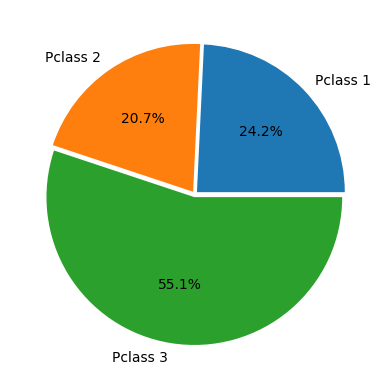

In [192]:
plt.pie(df.groupby('Pclass')['Pclass'].count().values, labels=['Pclass 1','Pclass 2','Pclass 3'], autopct='%1.1f%%',explode=[.02,.02,.02])

In [193]:
# Pclass 1 had 24.2% travelers, fare was high
# Pclass 2 had 20.7% travelers, fare was inbetween high and low
# Pclass 3 had 55.1% travelers, fare was low

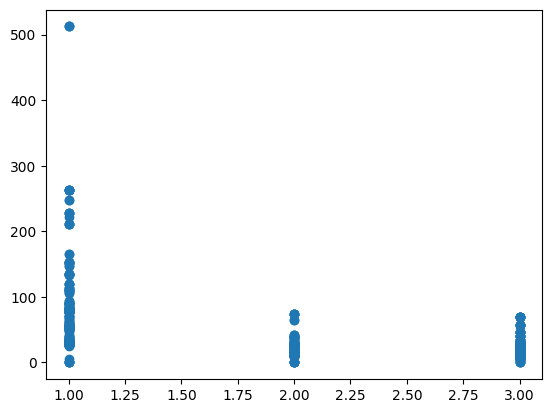

In [194]:
plt.scatter(df['Pclass'],df['Fare'])

<AxesSubplot: xlabel='SibSp', ylabel='count'>

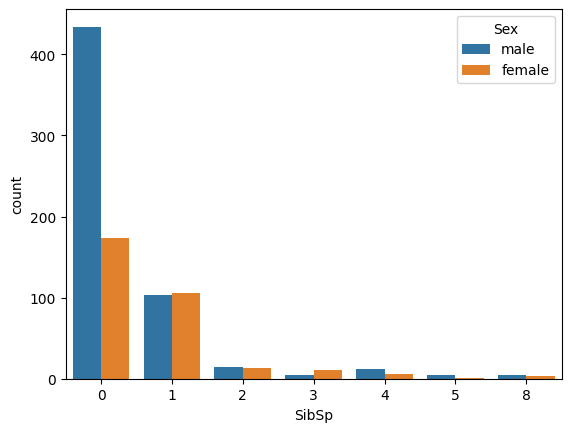

In [195]:
sns.countplot(x='SibSp',hue='Sex',data=df)

In [196]:
# Sibblings/ spouse  with male or female


In [197]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Text(0, 0.5, 'Fare')

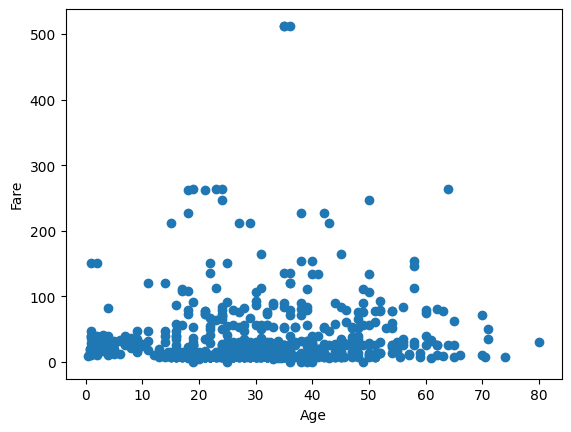

In [198]:
plt.scatter(df['Age'],df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')

In [199]:
# between age 20 to 67 peoples had got high fare ticket like for Pclass 1

# Lets see Data Distribution

<AxesSubplot: xlabel='Age', ylabel='Density'>

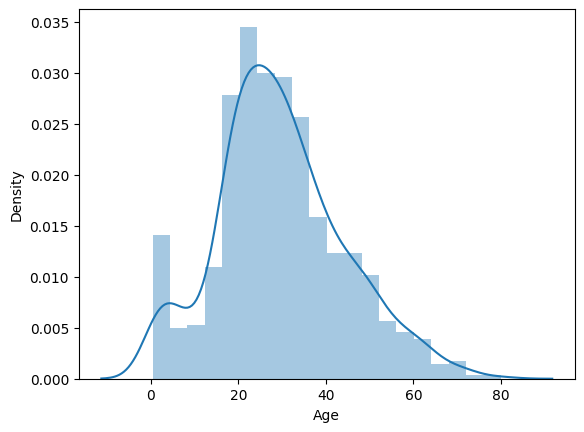

In [200]:
sns.distplot(df['Age'])

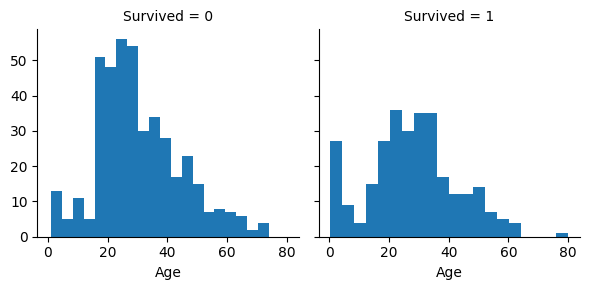

In [201]:
sns.FacetGrid(df,col='Survived').map(plt.hist,'Age',bins=20)

In [202]:
# Not survived numbers are high

In [203]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot: xlabel='Age', ylabel='Pclass'>

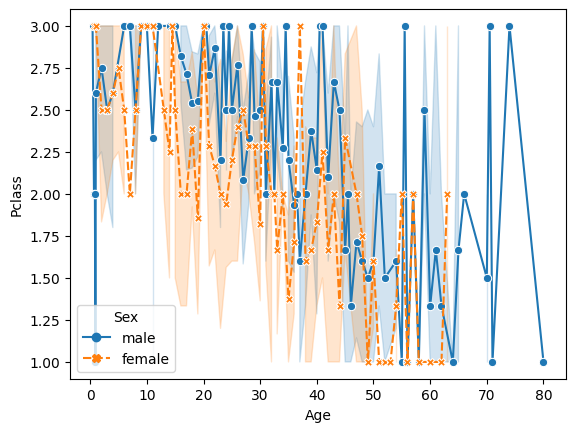

In [204]:
sns.lineplot(x='Age',y='Pclass',hue='Sex',style='Sex',markers=True, data=df)

<AxesSubplot: xlabel='Survived', ylabel='Age'>

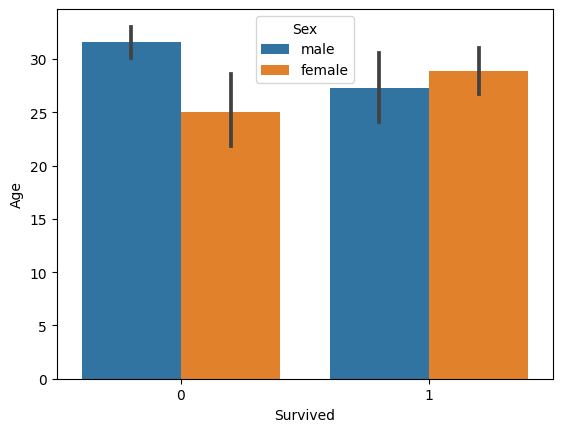

In [205]:
sns.barplot(x='Survived',y='Age',hue='Sex', data=df)

<AxesSubplot: xlabel='Age', ylabel='Fare'>

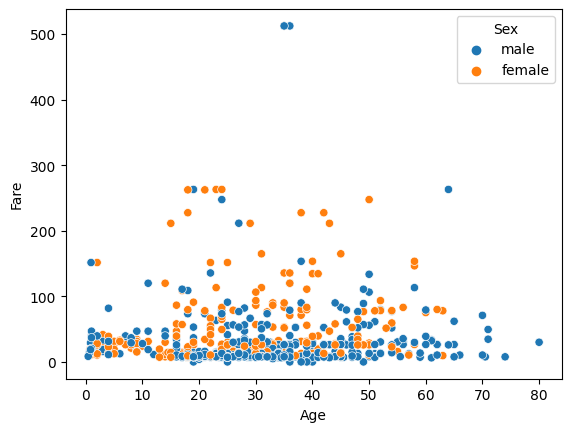

In [206]:
sns.scatterplot(x='Age',y='Fare',hue='Sex', data=df)

In [207]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

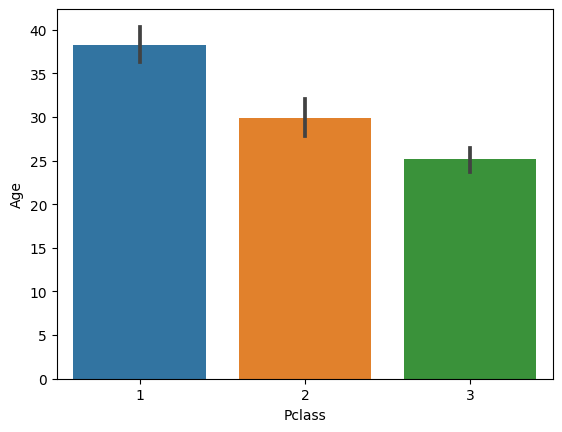

In [208]:
sns.barplot(x='Pclass',y='Age',data=df) # having more age peoples in class 1 

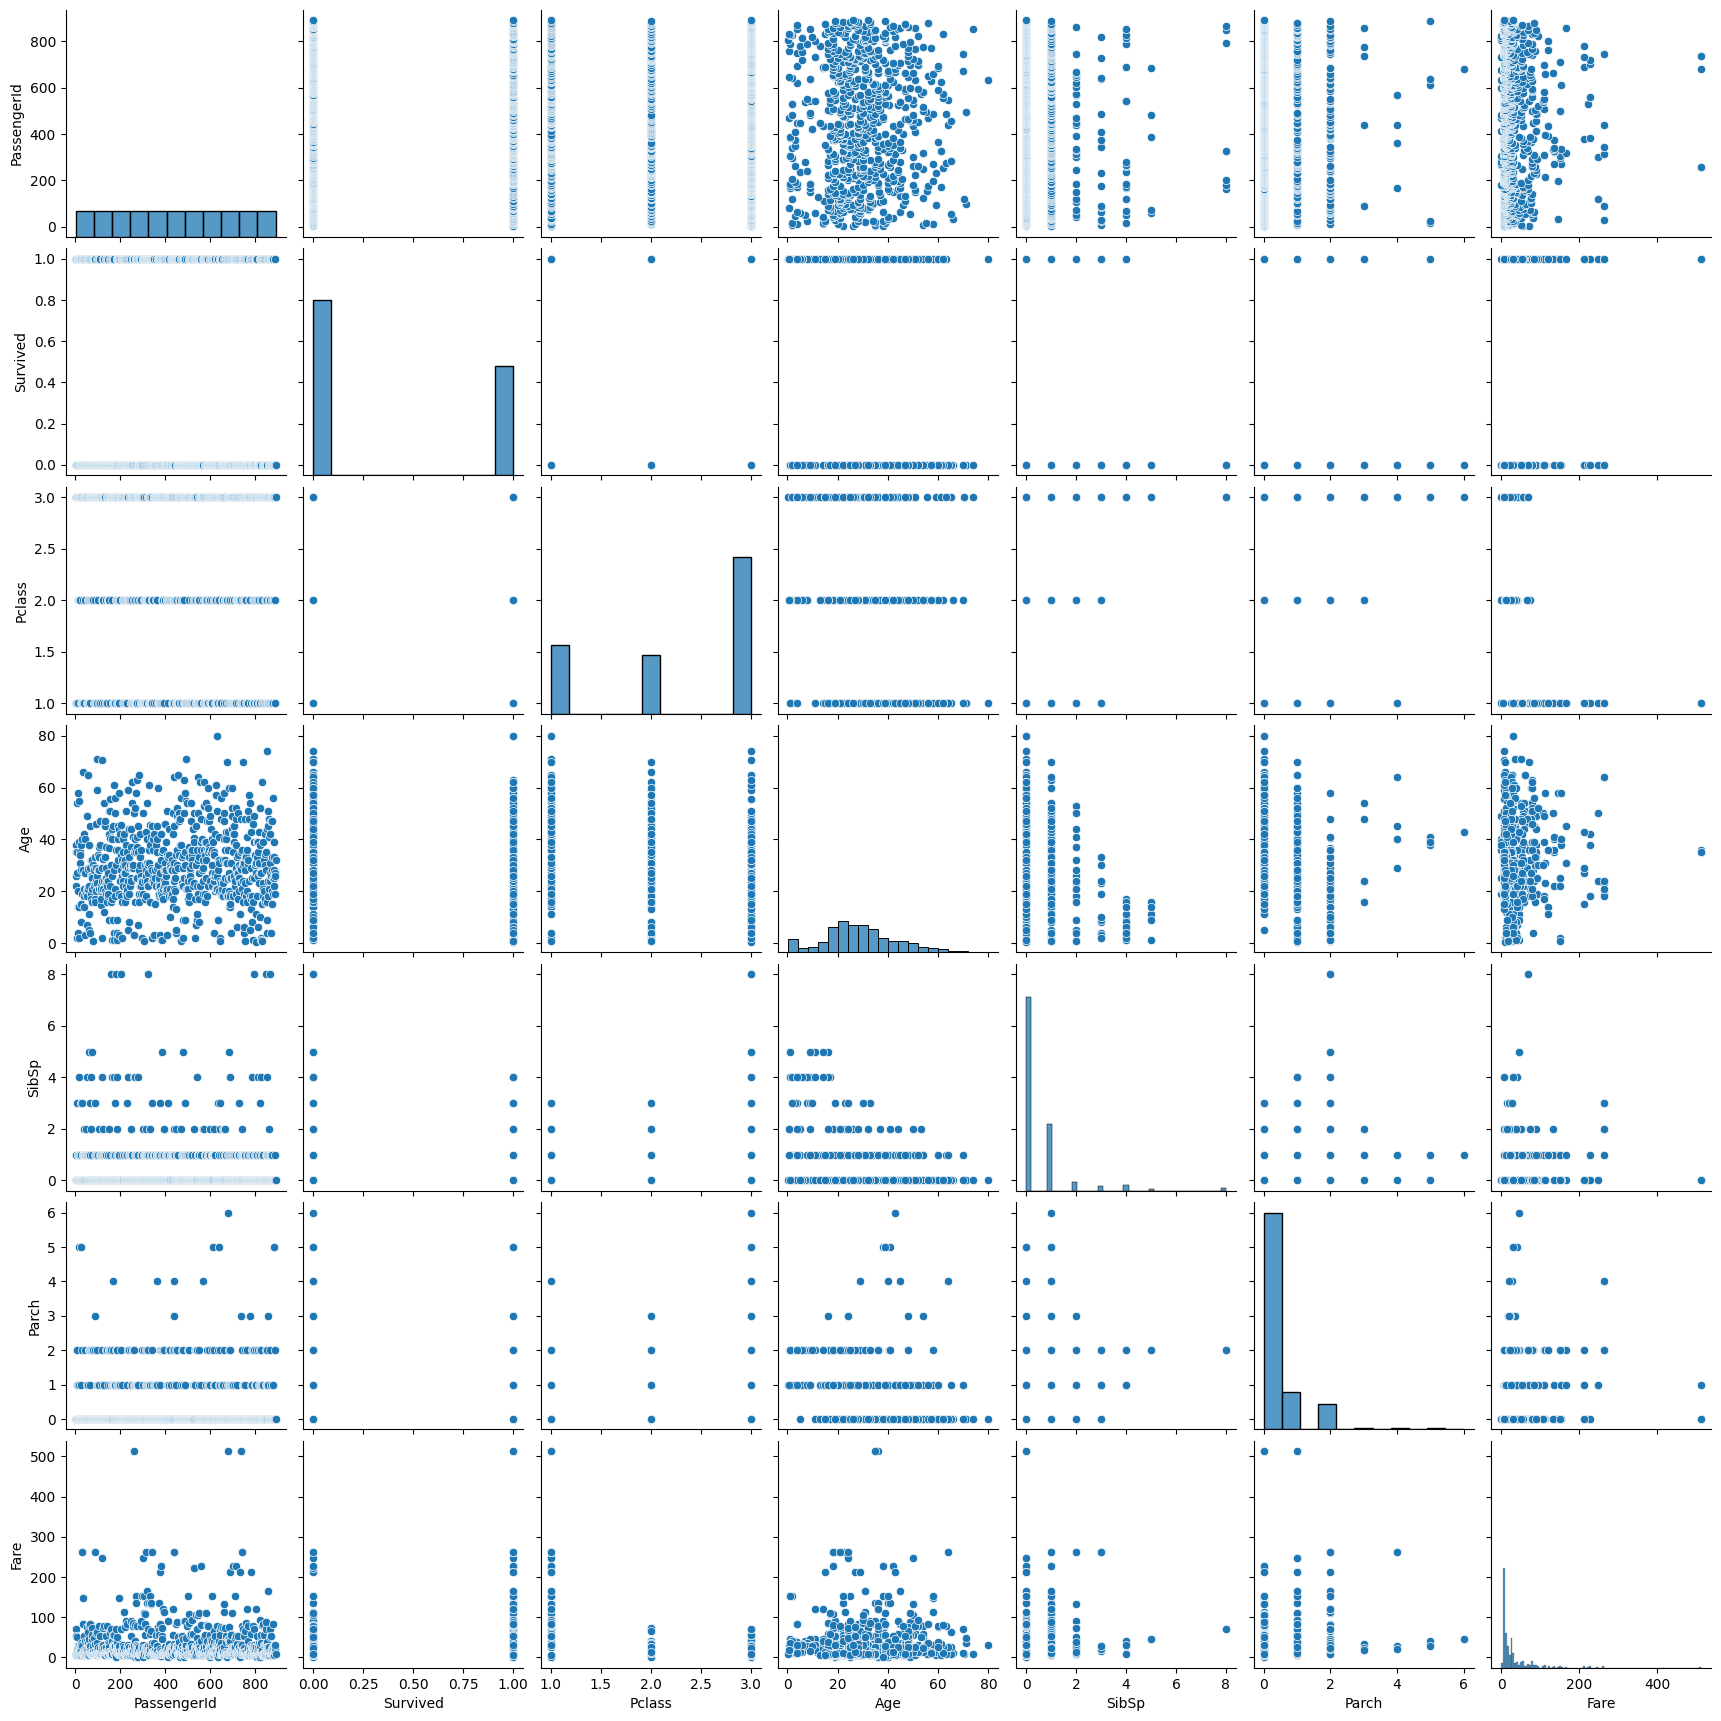

In [209]:
sns.pairplot(df)

In [210]:
#conclusion:
#Pclass vs Survived:  Peoples died from all Pclass
#Age vs Survived: People died of all age

# Check target  balanced of imbalanced

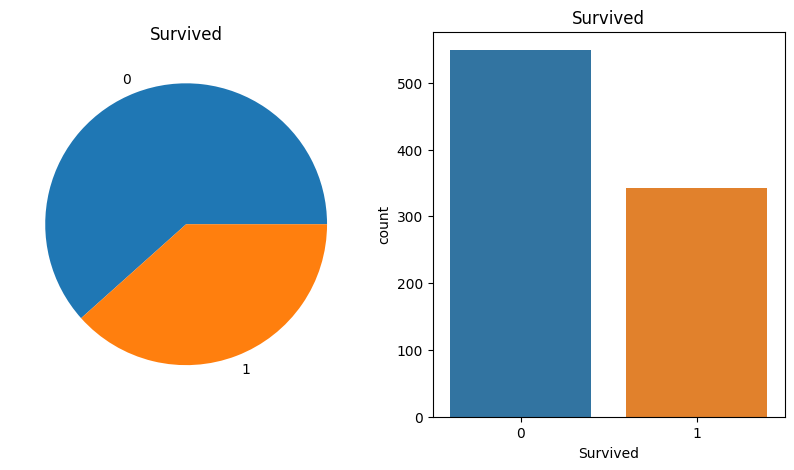

In [211]:
f,ax= plt.subplots(1,2,figsize=(10,5))
df['Survived'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()


In [212]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Cabin column  77% data is missing, so filling Null vales will be impractical and it will create bias


In [ ]:
df.drop(['Cabin'],axis=1, inplace=True)

In [214]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [216]:
# Although we have Sex and Age to describe about Passanger so we dnt require Name here.

In [217]:
# NAme doesnot matter about survival, age, gender does. so we can drop this column as well.

In [ ]:
df.drop(df=['Name'], axis=1,inplace=True)

In [276]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S


In [234]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [ ]:
# df['Survived'] is Target variable.

In [273]:
#Seprate dependent and Independent variables

X= df.drop('Survived', axis=1)
Y= df['Survived']

In [236]:
Y= pd.DataFrame(Y)

In [277]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,female,38.0,1,0,PC 17599,71.2833,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,female,35.0,1,0,113803,53.1000,S
5,3,male,35.0,0,0,373450,8.0500,S


In [226]:
X['Parch'].unique()  # means parent and childen

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [227]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot: >

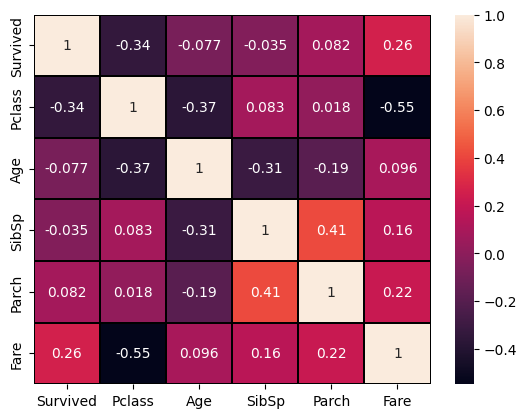

In [237]:
sns.heatmap(df.corr(),annot=True, linecolor='black', linewidths=.25)

In [ ]:
#Correlation:  
# Survived with Pclass= -.34
# Survived with Age = -.077
# Survived with SibSp  = -.035
# Survived with Parch = .082
# Survived with Fare  = .26

# Few are negatively low correlated and few positively low correlated

# Handing missing values()

In [238]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [239]:
X['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [240]:
X['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [241]:
X[X['Embarked'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
62,1,female,38.0,0,0,113572,80.0,NaN
830,1,female,62.0,0,0,113572,80.0,NaN


In [245]:
X['Embarked'].fillna('S', inplace=True)

In [244]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [246]:
X.iloc[62,]  # NaN filled with 'S'

Pclass           1
Sex           male
Age           45.0
SibSp            1
Parch            0
Ticket       36973
Fare        83.475
Embarked         S
Name: 63, dtype: object

In [247]:
X['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Handle Missing values in Age

#Instead of putting Mean or mode for the column, will take median

In [248]:
X.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [249]:
X.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [250]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,female,38.0,1,0,PC 17599,71.2833,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,female,35.0,1,0,113803,53.1000,S
5,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
# we have mean age for men = 30.72  and for women is 27.915,lets impute this with Median instead

In [251]:
X.groupby('Sex')['Age']

In [ ]:
# X[X['Sex']=='male'].fillna('29', inplace=True)

In [ ]:
# X[X['Sex']=='female'].fillna('27', inplace=True)

In [252]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [253]:
X['Age']= X['Age'].fillna(X.groupby('Sex')['Age'].transform('median'))

In [254]:
X.iloc[5]

Pclass           3
Sex           male
Age           29.0
SibSp            0
Parch            0
Ticket      330877
Fare        8.4583
Embarked         Q
Name: 6, dtype: object

In [255]:
X.iloc[19]

Pclass           3
Sex         female
Age           27.0
SibSp            0
Parch            0
Ticket        2649
Fare         7.225
Embarked         C
Name: 20, dtype: object

In [256]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [257]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,female,38.0,1,0,PC 17599,71.2833,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,female,35.0,1,0,113803,53.1000,S
5,3,male,35.0,0,0,373450,8.0500,S


In [258]:
X.tail()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
887,2,male,27.0,0,0,211536,13.00,S
888,1,female,19.0,0,0,112053,30.00,S
889,3,female,27.0,1,2,W./C. 6607,23.45,S
890,1,male,26.0,0,0,111369,30.00,C
891,3,male,32.0,0,0,370376,7.75,Q


In [259]:
X.shape

(891, 8)

In [260]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')